<a href="https://colab.research.google.com/github/justdelsxo/sql-for-data-analysis-3271025/blob/main/Skntone_product_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [318]:
#Customer Segmentation & Journey Mapping

In [319]:
import pandas as pd

# Dataset for Skntone's products
data = [
    {"product": "Ingrown Remedy", "concern": "ingrown hairs, razor bumps, redness, irritation", "key_ingredient": "Tea Tree Oil, Salicylic Acid", "product_type": "treatment"},
    {"product": "Blemish Butter", "concern": "blemishes, dark marks, hyperpigmentation", "key_ingredient": "Alpha Arbutin, Shea Butter, Licorice Root, Papaya Seed", "product_type": "cream"},
    {"product": "Bikini Area Mask", "concern": "blocked pores, blemishes, dark marks, hyperpigmentation, redness, dark marks", "key_ingredient": "Bentonite Clay, Turmeric, Aloe Vera", "product_type": "mask"},
    {"product": "Intimate Toner", "concern": "hyperpigmentation, blemishes, dark marks, texture irregularities, strawberry legs", "key_ingredient": "Glycolic Acid, Witch hazel, Aloe", "product_type": "toner"},
    {"product": "Body Oil Spray", "concern": "dry skin, sensitive skin", "key_ingredient": "Jojoba Oil, Oat Oil, Soya Bean Oil", "product_type": "oil"},
    {"product": "Salt Body Scrub", "concern": "rough skin, dry skin", "key_ingredient": "Dead Sea Salt, Himalayan Salt, Almond Oil", "product_type": "scrub"},
    {"product": "Intimate Wash", "concern": "unbalanced pH balance, intimate odour, menstrual cramps", "key_ingredient": "Aloe, Cranberry Extract, Lavender, Chamomile", "product_type": "wash"}
]

# Create a pandas DataFrame
prods = pd.DataFrame(data)

# Display the dataset
prods

,product,concern,key_ingredient,product_type
0,Ingrown Remedy,"ingrown hairs, razor bumps, redness, irritation","Tea Tree Oil, Salicylic Acid",treatment
1,Blemish Butter,"blemishes, dark marks, hyperpigmentation","Alpha Arbutin, Shea Butter, Licorice Root, Pap...",cream
2,Bikini Area Mask,"blocked pores, blemishes, dark marks, hyperpig...","Bentonite Clay, Turmeric, Aloe Vera",mask
3,Intimate Toner,"hyperpigmentation, blemishes, dark marks, text...","Glycolic Acid, Witch hazel, Aloe",toner
4,Body Oil Spray,"dry skin, sensitive skin","Jojoba Oil, Oat Oil, Soya Bean Oil",oil
5,Salt Body Scrub,"rough skin, dry skin","Dead Sea Salt, Himalayan Salt, Almond Oil",scrub
6,Intimate Wash,"unbalanced pH balance, intimate odour, menstru...","Aloe, Cranberry Extract, Lavender, Chamomile",wash


<ipython-input-320-265683ee8275>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=concerns.index, y=concerns.values, palette='viridis')


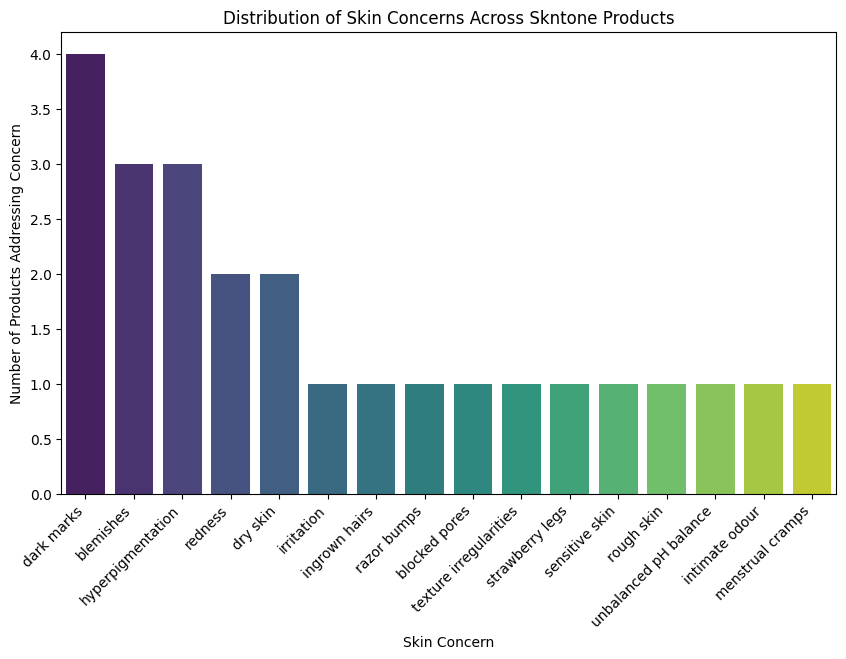

<ipython-input-320-265683ee8275>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_types.index, y=product_types.values, palette='Set2')


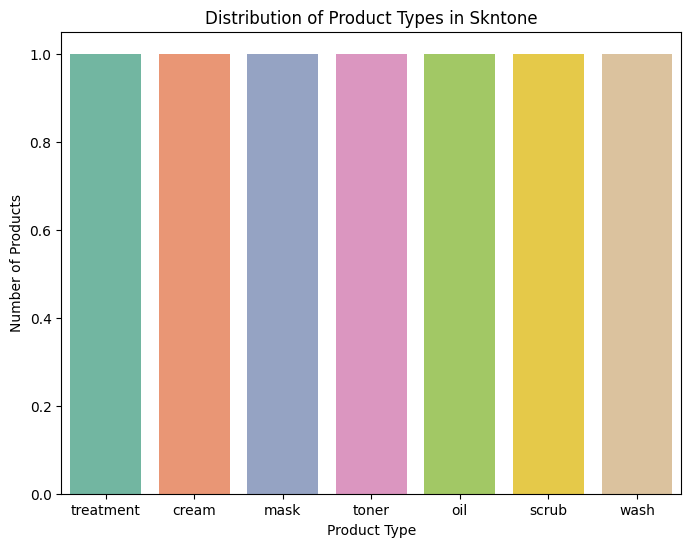

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualise skin concerns per product
concerns = prods['concern'].str.split(',').explode().str.strip().value_counts()

# Plotting the distribution of skin concerns across products
plt.figure(figsize=(10, 6))
sns.barplot(x=concerns.index, y=concerns.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Skin Concerns Across Skntone Products")
plt.xlabel("Skin Concern")
plt.ylabel("Number of Products Addressing Concern")
plt.show()

# Visualise product types
product_types = prods['product_type'].value_counts()

# Plot the distribution of product types
plt.figure(figsize=(8, 6))
sns.barplot(x=product_types.index, y=product_types.values, palette='Set2')
plt.title("Distribution of Product Types in Skntone")
plt.xlabel("Product Type")
plt.ylabel("Number of Products")
plt.show()

In [321]:
# Get user input for skin concern
user_concern = input("What skin concern would you like to address? (e.g., ingrown hairs, blemishes, hyperpigmentation): ").lower()

# Filter the products based on the user’s concern
recommended_products = prods[prods['concern'].str.contains(user_concern)]

if not recommended_products.empty:
    print("Here's what we recommend based on your concerns:")
    print(recommended_products[['product', 'key_ingredient']])
else:
    print("No exact match found. Try entering other concerns.")

What skin concern would you like to address? (e.g., ingrown hairs, blemishes, hyperpigmentation): ingrowns
No exact match found. Try entering other concerns.


In [322]:
# help the system understand a variation of words that may be inputted

synonym_map = {
    'ingrowns': 'ingrown hairs',
    'dark spots': 'hyperpigmentation',
    'razor burn': 'razor bumps',
    'bikini bumps': 'razor bumps',
    'discoloration': 'discolouration',
    'uneven tone': 'hyperpigmentation',
    'dark area' : 'hyperpigmenation'

}

def clean_input(text):
    for slang, standard in synonym_map.items():
        text = text.replace(slang, standard)
    return text

In [323]:
def recommend_products(user_input, top_n=3):
    user_input = user_input.lower()
    user_input = clean_input(user_input)

    user_vec = vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(user_vec, tfidf_matrix).flatten()

    top_indices = similarity_scores.argsort()[::-1][:top_n]
    return prods.iloc[top_indices][['product', 'concern', 'key_ingredient']]

In [324]:
# Testing the system with fuzzy/slang input
user_input = "I need help with ingrowns and razor burn"
recommendations = recommend_products(user_input)

# Show results
print("Top Recommended Products:\n")
recommendations

Top Recommended Products:



,product,concern,key_ingredient
0,Ingrown Remedy,"ingrown hairs, razor bumps, redness, irritation","Tea Tree Oil, Salicylic Acid"
5,Salt Body Scrub,"rough skin, dry skin","Dead Sea Salt, Himalayan Salt, Almond Oil"
6,Intimate Wash,"unbalanced pH balance, intimate odour, menstru...","Aloe, Cranberry Extract, Lavender, Chamomile"


Add reviews for further advancements

In [325]:
#Load reviews file
reviews=pd.read_csv("reviews.csv")
reviews

,title,body,rating,review_date,source,curated,reviewer_name,reviewer_email,product_id,product_handle,reply,reply_date,picture_urls,ip_address,location,metaobject_handle
0,Obsessed with this product.,This product is a Godsend! If you love whipped...,5,2020-11-04 18:07:43 UTC,web,ok,Zhane Fritz,zhanefritz@gmail.com,5.598534e+12,bikini-area-blemish-butter-100ml,NaN,NaN,NaN,82.132.225.16,"Sutton, England, United Kingdom",review-e4cb2046-110b-4232-b763-f28fb3dd4193
1,You've got me sold!,This product here is honestly the truth. Had o...,5,2020-11-04 18:16:07 UTC,web,ok,Brigeina Gyamfi,agyamfistudio@gmail.com,5.598535e+12,ingrown-remedy-30ml,NaN,NaN,NaN,94.209.33.127,"The Hague, South Holland, Netherlands",review-06fdf903-bd72-4347-9952-8ecc72486e90
2,Amazing,Love the butter the texture everything will be...,5,2020-11-05 19:02:49 UTC,web,ok,Le’Skin Clinic,cherelle.mitchell@hotmail.com,5.598534e+12,bikini-area-blemish-butter-100ml,NaN,NaN,NaN,81.158.16.29,"Hammersmith, England, United Kingdom",review-351138d0-7dbb-4ae8-80da-a285a801dde0
3,The best,"I love this butter, it’s really moisturizing a...",5,2020-11-14 12:37:59 UTC,web,ok,Leanne Gordon,leanne__14@hotmail.co.uk,5.598534e+12,bikini-area-blemish-butter-100ml,NaN,NaN,NaN,77.103.122.249,"Enfield, England, United Kingdom",review-bbe2be81-42d7-4ede-8703-0e4777f419c1
4,Great and favourite skincare product!,I absolutely love this and it’s my favourite p...,5,2020-11-20 18:11:23 UTC,web,ok,Nae,ldnnae@gmail.com,5.598534e+12,bikini-area-blemish-butter-100ml,NaN,NaN,NaN,213.205.194.118,"Croydon, England, United Kingdom",review-8a34734d-5884-455b-81c8-dc4d8046223e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,NaN,This my favourite oil and really does works on...,5,2024-04-04 11:53:35 UTC,shop-app,ok,Bruno Suenga,juninhocarlos18@outlook.com,5.598535e+12,ingrown-remedy-30ml,NaN,NaN,NaN,NaN,NaN,shop-2519111-131320217-c52a2125-96a2-4cdd-a22f...
179,The best body oil,I’m onto my third purchase of the body oil spr...,5,2024-05-01 11:54:41 UTC,web,ok,Olivia Williams,oliviamwilliams1@outlook.com,7.856291e+12,body-oil-spray-150ml,NaN,NaN,NaN,94.196.10.206,"Croydon, England, United Kingdom",review-4902f04b-5534-496a-bee7-03460604fbfd
180,NaN,Love the products,5,2024-07-24 19:07:54 UTC,shop-app,ok,Mawata Musukwa,mawatamusukwa@outlook.com,5.598534e+12,bikini-area-blemish-butter-100ml,NaN,NaN,NaN,NaN,NaN,shop-2519111-151008013-ef84b3f9-000a-4f86-a6ff...
181,It actually works,I use this anytime I’ve waxed and it really wo...,5,2024-10-26 13:34:20 UTC,web,ok,Tee,tkcoker99@gmail.com,5.598535e+12,ingrown-remedy-30ml,NaN,NaN,NaN,76.142.161.154,"Pearland, Texas, United States",review-5d025e7c-d5cb-481e-b7c9-c8898020a4ed


In [326]:
# Map product names to correlate with product recommendation system names

product_name_map = {
    'ingrown-remedy-30ml':'Ingrown Remedy',
    'body-oil-spray-150ml':'Body Oil Spray',
    'bikini-area-blemish-butter-100ml':'Blemish Butter',
    'bikini-area-mask':'Bikini Area Mask',
    'intimate-toner':'Intimate Toner',
    'salt-body-polish-250g':'Salt Body Scrub',
    'intimate-wash':'Intimate Wash'
}

In [327]:
# Create new column with standadised product names
reviews['product'] = reviews['product_handle'].map(product_name_map)


In [328]:
# drop unecessary columns
reviews_final = reviews.drop(columns=[
    'reply',
    'reply_date',
    'picture_urls',
    'ip_address',
    'metaobject_handle',
    'product_handle',
    'source',
    'curated',
    'reviewer_email',
    'product_id'
    ])
reviews_final

,title,body,rating,review_date,reviewer_name,location,product
0,Obsessed with this product.,This product is a Godsend! If you love whipped...,5,2020-11-04 18:07:43 UTC,Zhane Fritz,"Sutton, England, United Kingdom",Blemish Butter
1,You've got me sold!,This product here is honestly the truth. Had o...,5,2020-11-04 18:16:07 UTC,Brigeina Gyamfi,"The Hague, South Holland, Netherlands",Ingrown Remedy
2,Amazing,Love the butter the texture everything will be...,5,2020-11-05 19:02:49 UTC,Le’Skin Clinic,"Hammersmith, England, United Kingdom",Blemish Butter
3,The best,"I love this butter, it’s really moisturizing a...",5,2020-11-14 12:37:59 UTC,Leanne Gordon,"Enfield, England, United Kingdom",Blemish Butter
4,Great and favourite skincare product!,I absolutely love this and it’s my favourite p...,5,2020-11-20 18:11:23 UTC,Nae,"Croydon, England, United Kingdom",Blemish Butter
...,...,...,...,...,...,...,...
178,NaN,This my favourite oil and really does works on...,5,2024-04-04 11:53:35 UTC,Bruno Suenga,NaN,Ingrown Remedy
179,The best body oil,I’m onto my third purchase of the body oil spr...,5,2024-05-01 11:54:41 UTC,Olivia Williams,"Croydon, England, United Kingdom",Body Oil Spray
180,NaN,Love the products,5,2024-07-24 19:07:54 UTC,Mawata Musukwa,NaN,Blemish Butter
181,It actually works,I use this anytime I’ve waxed and it really wo...,5,2024-10-26 13:34:20 UTC,Tee,"Pearland, Texas, United States",Ingrown Remedy


In [329]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Assign sentiment score using VADER
reviews_final['sentiment'] = reviews_final['body'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [330]:
avg_sentiment = reviews_final.groupby('product')['sentiment'].mean().reset_index()

In [331]:
prods = prods.merge(avg_sentiment, on='product', how='left')
prods['sentiment'] = prods['sentiment'].fillna(0.0)  # fill products without reviews

In [332]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_products(user_input, top_n=3):
    user_input = user_input.lower()
    user_input = clean_input(user_input)  # including synonym map (slang and fuzzy words)

    user_vec = vectorizer.transform([user_input])
    similarity_scores = cosine_similarity(user_vec, tfidf_matrix).flatten()

    # Combine similarity score + sentiment
    combined_scores = similarity_scores + prods['sentiment'] * 0.3

    top_indices = combined_scores.argsort()[::-1][:top_n]
    return prods.iloc[top_indices][['product', 'concern', 'sentiment']]

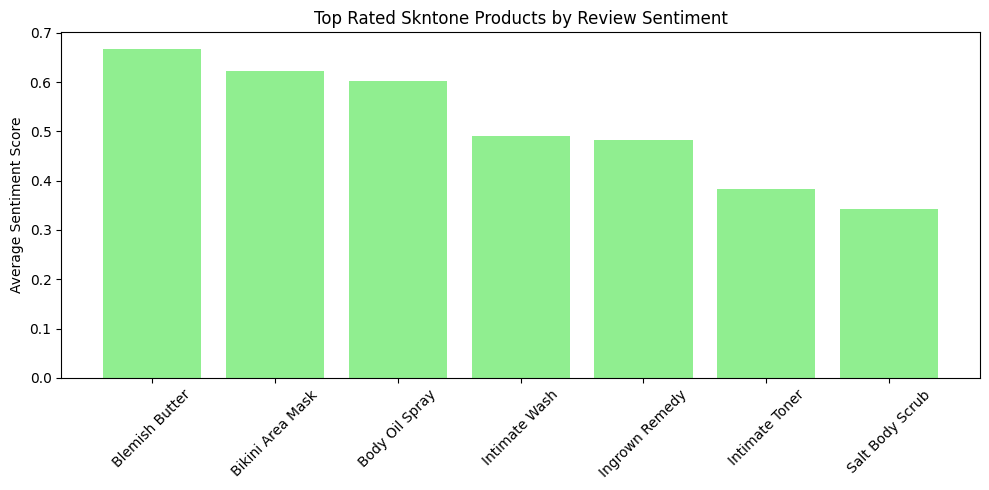

In [333]:
import matplotlib.pyplot as plt

top_rated = prods[['product', 'sentiment']].sort_values(by='sentiment', ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(top_rated['product'], top_rated['sentiment'], color='lightgreen')
plt.title("Top Rated Skntone Products by Review Sentiment")
plt.xticks(rotation=45)
plt.ylabel("Average Sentiment Score")
plt.tight_layout()
plt.show()

# Improve functionality by allowing multiple recommendations

In [ ]:
# Create a known concerns list to try to cover all possibly inputs for Skntones products based on data from google analytics and shopify

In [337]:
known_concerns = [
    "ingrown hairs", "dark bikini area", "razor bumps", "redness", "irritation",
    "dark marks", "blemishes", "hyperpigmentation",
    "dry skin", "discolouration", "texture irregularities",
    "pH balance", "odour", "menstrual cramps",
    "exfoliation", "strawberry legs", "uneven tone", "itchiness"
]

In [338]:
from sklearn.metrics.pairwise import cosine_similarity

def extract_mapped_concerns(user_input, known_concerns, synonym_map):
    # Step 1: Replace slang with standard terms using your synonym map
    cleaned_input = user_input.lower()
    for slang, standard in synonym_map.items():
        cleaned_input = cleaned_input.replace(slang, standard)

    # Step 2: Match concerns
    matched = [c for c in known_concerns if c in cleaned_input]
    return matched

In [339]:
def multi_concern_recommender(user_input, threshold=0.2):
    matched_concerns = extract_mapped_concerns(user_input, known_concerns, synonym_map)
    all_matches = pd.DataFrame()

    for concern in matched_concerns:
        concern_vec = vectorizer.transform([concern])
        sim_scores = cosine_similarity(concern_vec, tfidf_matrix).flatten()

        # Combine with sentiment
        combined_scores = sim_scores + prods['sentiment'].fillna(0.0) * 0.3

        # Keep all products that are a good match
        matched_prods = prods[combined_scores > threshold].copy()
        matched_prods['match_score'] = combined_scores[combined_scores > threshold]
        matched_prods['matched_concern'] = concern

        all_matches = pd.concat([all_matches, matched_prods], ignore_index=True)

    # Remove duplicates (if multiple concerns lead to same product)
    all_matches = all_matches.drop_duplicates(subset='product')

    # Sort by match score
    all_matches = all_matches.sort_values(by='match_score', ascending=False)

    return all_matches[['product', 'matched_concern', 'concern', 'product_type', 'sentiment', 'match_score']]

In [341]:
multi_concern_recommender("I have ingrowns and dark inner thighs")

,product,matched_concern,concern,product_type,sentiment,match_score
0,Ingrown Remedy,ingrown hairs,"ingrown hairs, razor bumps, redness, irritation",treatment,0.482961,0.594775
1,Blemish Butter,ingrown hairs,"blemishes, dark marks, hyperpigmentation",cream,0.667523,0.200257
